/Users/gim-yuchan/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


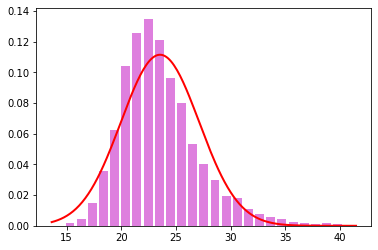

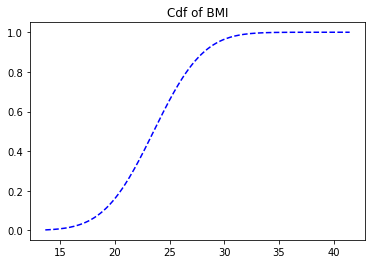

당신의 체중은(kg)? 68
당신의 키는(m)? 172
BMI : 22.985
당신의 BMI 백분위 : 0.438%
당신의 BMI 순위 : 4816위 / 10995명


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm 
import matplotlib.pyplot as plt

# 데이터 불러오기.
df = pd.read_csv('/Users/gim-yuchan/Downloads/국가건강검진_혈압혈당_데이터/국가건강검진_혈압혈당데이터.csv')
df.head()

# 20 ~ 24세 연령층만 이용.
df1 = df[df['BTH_G'] == 1]

# 성별 남자의 BMI 데이터만 추출.
BMI_Men = df1[df['SEX'] == 1]['BMI']
plt.hist(x = BMI_Men, bins = 25, rwidth = .8, alpha = 0.5, color = 'm',  density = 1)

# 정규분포를 그리기 위한 BMI의 평균과 표준편차 계산.
mu  = BMI_Men.mean()  
std = BMI_Men.std()

# 히스토그램과 동일한 x축 범위를 설정하기 위한 값 찾기.
x_min, x_max = plt.xlim()
x            = np.linspace(x_min, x_max, 200)
y            = norm(mu, std).pdf(x)
plt.plot(x, y, linewidth = 2, color = 'r')
plt.show()

y_cdf = norm.cdf(x, mu, std)
plt.plot(x, y_cdf, linestyle = 'dashed', color = 'b')
plt.title('Cdf of BMI')
plt.show()

# BMI 지수 계산 함수 생성.
def BMI(weight, height) : 
    height /= 100
    return weight / (height ** 2)  

# 입력값을 통해 체중 및 키 데이터 받기.
weight = float(input("당신의 체중은(kg)? ")) 
height = float(input("당신의 키는(m)? ")) 

# 나의 BMI 계산.
My_BMI = BMI(weight,height) 

# 20 ~ 24세 남자 데이터 수.
Total = len(BMI_Men)
percentile = norm.cdf(My_BMI, mu, std)
rank = percentile * Total

print(f'BMI : {round(My_BMI,3)}')   
print(f'당신의 BMI 백분위 : {round(percentile, 3)}%')
print(f'당신의 BMI 순위 : {int(rank)}위 / {Total}명') 